# AI4GSD Demo for grain size extraction
------------------------------------------
## Smartphone photo
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Import required packages
#### 2. Define working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI for validation purpuse
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data

### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

In [2]:
### 1. Import required packages

In [3]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

In [4]:
### 2. Define working directory

In [5]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20250521_YC_WakingPhoneRoadTest'                            # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername              

In [6]:
### 3. Extracting or copying your videos/photos to desired folder

In [7]:
#%% (1) Extracting or copying your videos/photos to desired folder.
AI4GSD.getPhotos(PhotoDir,nframe=500, overwrite=False)                     # Use once.

Cuts photos output folder: D:\Github\AI4GSD\Demo_Data\20250521_YC_WakingPhoneRoadTest\
Video photo output folder: D:\Github\AI4GSD\Demo_Data\20250521_YC_WakingPhoneRoadTest
Cutting IMG_9683.MOV: to size 1280(w) * 1280(h) every 500 frames.
IMG_9683.MOV: get frame 1 from 500/2171 in 0.00 s (23.03%), file existed, skipping...
IMG_9683.MOV: get frame 2 from 1000/2171 in 0.00 s (46.06%), file existed, skipping...
IMG_9683.MOV: get frame 3 from 1500/2171 in 0.00 s (69.09%), file existed, skipping...
IMG_9683.MOV: get frame 4 from 2000/2171 in 0.00 s (92.12%), file existed, skipping...

Computation done, elapsed time 0.48 seconds.




In [8]:
### 4. Obtaining scales from AI for validation purpuse

In [9]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                    # Overwrite everything if True.
PP.Directory = PhotoDir
PP.OverWriteScaleFile = False
PP.OverWriteScaleRows = True
PP.ScaleSource = 'AI'                                                      # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ConfidenceThreshold = 0.85                                              # Minimum confidence threshold.
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20250521_YC_WakingPhoneRoadTest
Estimating photo resolution via local AI model: YOLO11m.1280.20250825
Model layer: 113, model parmeter: 20.06M, submodule number: 409
1/4: photo 1/4, IMG_9683_500.png, scale greencap, res 0.62 mm/px, status 200, (25.00%), 13.13 s
2/4: photo 2/4, IMG_9683_1000.png, scale greencap, res 0.59 mm/px, status 200, (50.00%), 3.58 s
3/4: photo 3/4, IMG_9683_1500.png, scale greencap, res 0.59 mm/px, status 200, (75.00%), 3.56 s
4/4: photo 4/4, IMG_9683_2000.png, scale greencap, res 0.63 mm/px, status 200, (100.00%), 3.45 s
Total time: 31.44 s, time per photo 7.86 s
-----------------------------------------------------------------



In [10]:
### 5. Obtaining segmentation of anthropogenic objects

In [11]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
PP.SegmentationClassName =['people','road','steel']                        # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20250521_YC_WakingPhoneRoadTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 4, number of exluded photos 0
20250521_YC_WakingPhoneRoadTest: 1/4: IMG_9683_500.png (25.00%)
20250521_YC_WakingPhoneRoadTest: 2/4: IMG_9683_1000.png (50.00%)
20250521_YC_WakingPhoneRoadTest: 3/4: IMG_9683_1500.png (75.00%)
20250521_YC_WakingPhoneRoadTest: 4/4: IMG_9683_2000.png (100.00%)
Total time: 8.12 s, time per photo 2.03 s
-----------------------------------------------------------------



In [12]:
### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20250521_YC_WakingPhoneRoadTest
Output folder: 20250521_YC_WakingPhoneRoadTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 4, number of exluded photos 0
1/4: IMG_9683_500.png, resolution 0.62 mm/px (25.00%), 0.00 s
Detected 595 rocks, diagonal and count based D10, D50, D60, and D84 are: 2.61, 4.10, 4.47, and 5.59 cm
Detected 595 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.37, 4.99, 5.32, and 6.39 cm


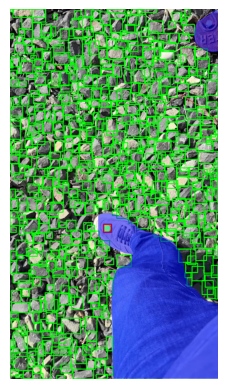

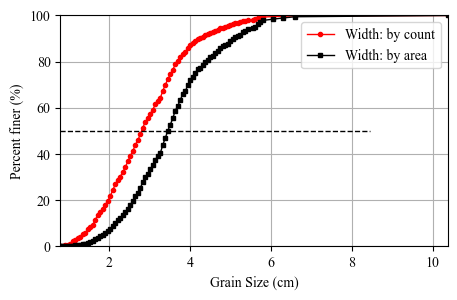

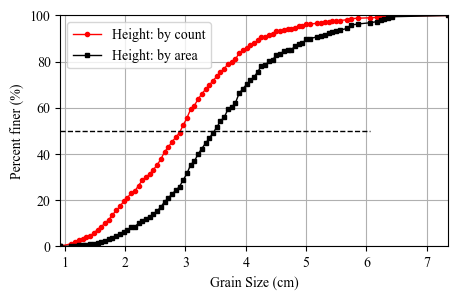

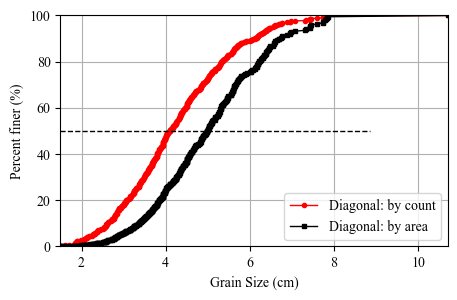

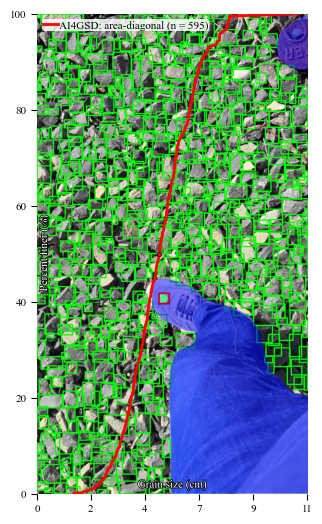

2/4: IMG_9683_1000.png, resolution 0.59 mm/px (50.00%), 13.02 s
Detected 619 rocks, diagonal and count based D10, D50, D60, and D84 are: 2.14, 3.58, 3.83, and 4.75 cm
Detected 619 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.76, 4.32, 4.56, and 5.50 cm


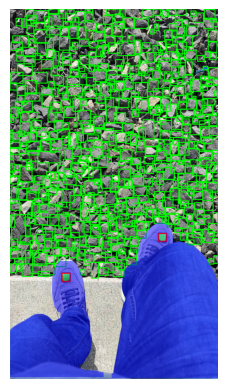

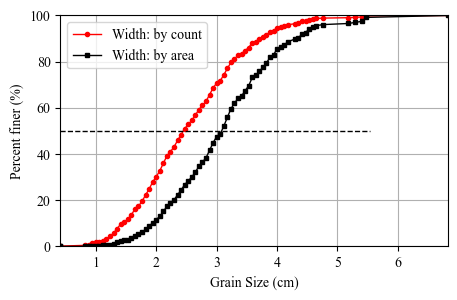

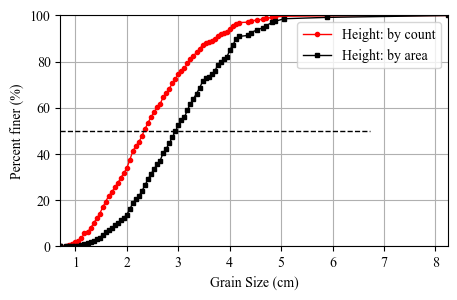

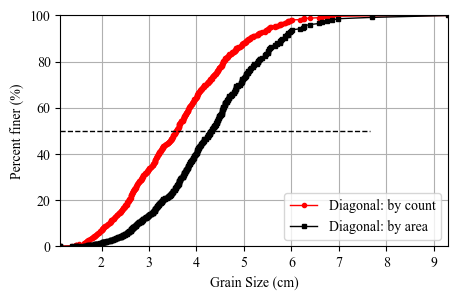

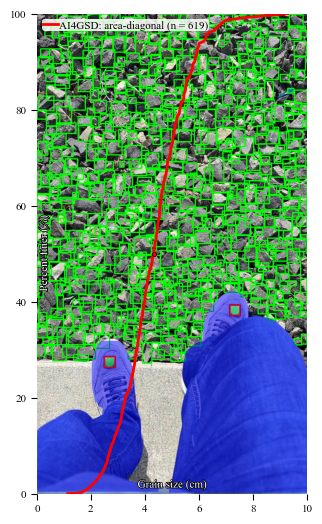

3/4: IMG_9683_1500.png, resolution 0.59 mm/px (75.00%), 11.63 s
Detected 626 rocks, diagonal and count based D10, D50, D60, and D84 are: 2.14, 3.63, 3.96, and 4.81 cm
Detected 626 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.96, 4.40, 4.64, and 5.50 cm


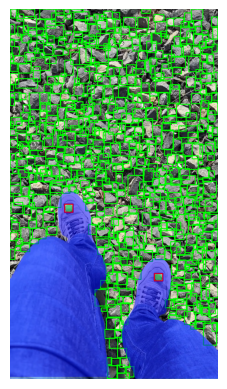

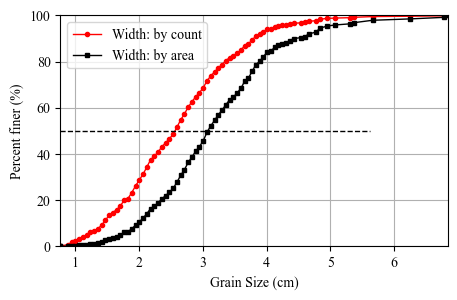

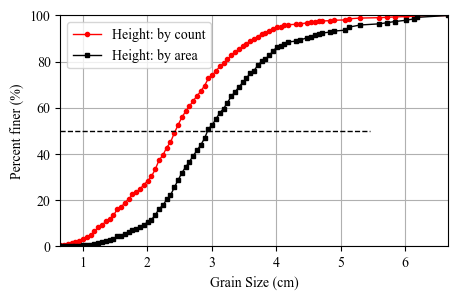

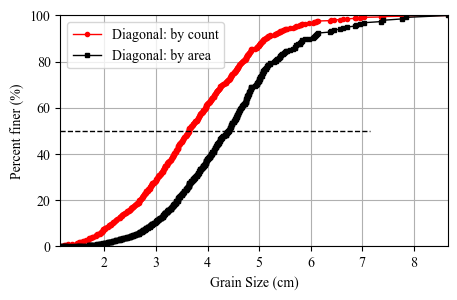

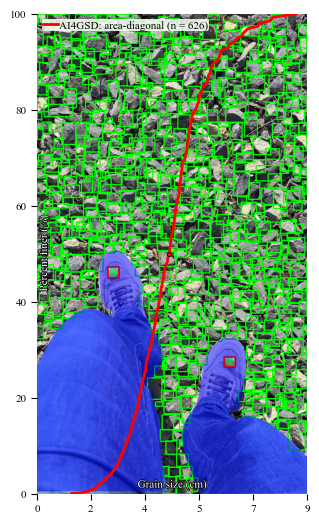

4/4: IMG_9683_2000.png, resolution 0.63 mm/px (100.00%), 12.72 s
Output folder summary data to: D:\Github\AI4GSD\Demo_Data\20250521_YC_WakingPhoneRoadTest\grains_predicts\20250521_YC_WakingPhoneRoadTest_YOLO11m.1280.20250322_35\Statistics_V3_20250521_YC_WakingPhoneRoadTest_YOLO11m.1280.20250322_35.csv
Total number of grains: 1840, number of grains per photo: 460.00
Total time: 40.81 s, time per photo 10.20 s

Output all summary data to: D:\Github\AI4GSD\Demo_Data\20250521_YC_WakingPhoneRoadTest\Statistics_V3_20250521_YC_WakingPhoneRoadTest_YOLO11m.1280.20250322_35.csv
Total execution time: 40.82 s


In [13]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.YOLOSave = False
PP.SaveFigure = True
PP.SaveOverlay = True
PP.OverWriteAll = True                                                  
PP.PrintOnScreen = True  
PP.MaximumGrainSize = 0.15
PP.OverlayFontSize = 4
PP.OverlayLegendFontSize = 4
PP.OverlayGSDTickLineWidth = 4
gsd = AI4GSD.Photo2GSD(PP)